# Acoustic Positioning System Lab: Cross Correlation

### EE16A: Designing Information Devices and Systems I, Summer 2017

**Name 1:**

**Login:** ee16a-

**Name 2:**

**Login:** ee16a-

#### [Lab Presentation](https://docs.google.com/presentation/d/1ccamolB2sI-D63CRtwl9Nv_pZRCNMlXqW49b8MFqJCQ/edit?usp=sharing)
#### [Introduction](#w1)
#### [Task 1: Measuring the Similarity of Two Signals](#task1)
#### [Task 2: Extracting information](#task2)
#### [Task 3: Separating Real Signals](#task3)

## Check in
Please check in here: https://goo.gl/forms/jl8p4VAAlkmLryiG3. This is purely to log time spent in lab. Consider this to be unofficial attendance. 

<a id='w1'></a>
## Introduction

There are various positioning systems in our life, and we use them every day. The most commonly used one is the [Global Positioning System (GPS)](http://en.wikipedia.org/wiki/Global_Positioning_System). The navigation systems in cars, Google Maps, cell phones, and even rockets and spaceships all use the GPS.

In this lab, we are going to explore the basics of these navigation systems and build our own. At the end of this lab module, you will be able to determine your location in a 2D area using your code and a microphone!

<font color="red">Before you start: 
1. Plug in speakers and microphone then restart kernel (Kernel -> Restart)
2. Turn your speakers down to a quiet level - the audio signals we'll use will have some high frequencies and they don't need to be too loud in order to complete the lab!

<font color="black">
## Basic Principle of Operation
GPS satellites broadcast a variety of measurements including time from a very precise clock, as well as the satellite's position, velocity, etc. GPS receivers make use of the fact that light propagates at a known speed, so the receiver can compute distance from the satellite by measuring how long it takes the GPS signal to propagate from the satellite to the receiver.

<center>
<img src="http://inst.eecs.berkeley.edu/~ee16a/sp15/Labs/location/nb_img/wk1_standard_gps.png" align="center" style="height:250px">
**Source**: [Kathleen Cantner, AGI](http://www.earthmagazine.org/article/precise-fault-how-gps-revolutionized-seismic-research)
</center>

Just like the GPS, we will use speakers as our signal emitters (like the "GPS satellite"), and use microphones (our version of the "GPS radio chip") to receive the signals. Using the microphone, we have essentially created an Acoustic Positioning System, as opposed to a Global Positioning System. We can determine distances to each satellite based on the delay between the times at which we receive each signal.

<a id='background'></a>
## Extracting Information
The block diagram below shows a high level overview of the full system. We begin by transmitting the signal from the speakers. This signal is then recorded by the microphone and converted to a format we can use for further processing. Next, the signal from each speaker are identified and the time differences are used to determine locations.

<center>
<img src="http://i.imgur.com/ZX5GJtD.png" align="center" style="height:450px">
</center>

<a id='task1'></a>
## <font color="blue">Task 1: Measuring the Similarity of Two Signals

Just like real GPS, our APS setup will have multiple speaker-satellites emitting signals, and a single microphone receiver. The signal that we receive at the microphone will be a sum of the individual speaker outputs. We will sift through the microphone signal to find audio signals that are unique from each speaker. We will use a tool called **cross-correlation** to perform this sifting. In order to perform cross-correlation, we are essentially comparing the signal we receive with a stored copies of the signal coming from the speakers. 

**[Cross-correlation](http://en.wikipedia.org/wiki/Cross-correlation)** is a measure of similarity between two signals. It is a mathematical operation defined by taking successive products as one function slides past the other. More intuitively this is a measure of the "common area" or "overlap" between two signals with respect to time. For discrete signals, the "common area" at time $t$ is the product of the two signals evaluated at that time. Both a mathematical definition and an animation are shown below where f & g are real valued functions.

From lecture, we have learned how to calculate the cross-correlation vector for periodic signals. Let $\vec{x}$ be length $n$ cross-correlated with $\vec{y}$ of length $m$. 

$$\vec{\rho}_{xy}[m] \stackrel{\mathrm{def}}{=} \sum_{n=1}^{N} \vec{x}[n]\vec{y}[n-m]$$

<img src="http://i0.wp.com/www.fromquarkstoquasars.com/wp-content/uploads/2014/03/cross_correlation_animation_auto-tune.gif" border="0" alt="Animation demonstrating cross-correlation.">

In lectures and discussions you have mainly seen cross-correlation of signals that are periodic -- $\vec{x}$ and $\vec{y}$ are $N$-periodic (and then go on forever). However, many a times signals are not periodic and are of finite length (and not necessarily of equal length). Correlation is a similarity metric. So we can still look for similarity between signals but the operation changes slightly. This post will mainly be helpful for these APS labs.

Lets say we have two vectors: $\vec{x}$ of length $n_x$ and $\vec{y}$ of length $n_y$ and $n_x > n_y$. These do not represent periodic signals -- rather these are the finite length signals themselves.

$$\vec{x} = \begin{bmatrix} x[0] \\ x[1] \\ \vdots \\ x[n_x - 1] \end{bmatrix}  \vec{y} = \begin{bmatrix} y[0] \\ y[1] \\ \vdots \\ y[n_y - 1] \end{bmatrix} $$

We want to correlate $\vec{x}$ with $\vec{y}$. How would we proceed to do this? The first question we ask is: what does correlation here mean? We can't do inner product of vectors that are not of the same length. So what do we do? We can 'zero-pad' $\vec{y}$ with $n_x - n_y$ zeros at the end to make it have the same 'dimensions' as $\vec{x}$. Note: this is just a step towards building cross-correlation for non-periodic signals. This is not the final recipe.

Lets come back to the question of correlation. Because shifting the signal isn't circular anymore zero padding doesn't solve the issue. So what does shifting actually do? We can think of correlating $\vec{x}$ with $\vec{y}$ as sliding $\vec{y}$ along $\vec{x}$ and multiplying the entries that align and adding them together. Some entries do not have a counterpart in the other vector, so we consider the vector to have a zero there instead and the resultant entry multiplication is zero and hence it doesn't add anything to that correlation.

Lets understand this better with an example. Let $\vec{x} = \begin{bmatrix} 1 \\ 2 \\ 3 \\ 2 \end{bmatrix}$ and $\vec{y} = \begin{bmatrix} -1 \\ 0 \\ 1 \end{bmatrix}$. The maximum shift to the left (corresponding to negative shifts) before there is no non-zero 'overlap' between $\vec{x}$ and $\vec{y}$ is 2 (in general $n_y - 1$) and the maximum shift to the right (corresponding to positive shifts) before there is no non-zero 'overlap' between $\vec{x}$ and $\vec{y}$ is 3 (in general $n_x - 1$).

The stem plot below shows $\vec{x}$.

The stem plot below shows $\vec{y}$.


And the stem plot below shows $\vec{x}$ (in blue) and $\vec{y}$ (in yellow) with a shift of $-1$. Notice the difference between the plot showing only $\vec{y}$ and this plot and the shift in the stems of $\vec{y}$. Also notice that $\vec{x}$ has not shifted, only $\vec{y}$ has.



So the cross-correlation vector $\vec{\rho_{\vec{x} \vec{y}}}$ is now:

$$\vec{\rho}_{\vec{x} \vec{y}} = \begin{bmatrix} \rho_{\vec{x} \vec{y}}[- (n_y - 1)] \\ \rho_{\vec{x} \vec{y}}[- (n_y - 2)] \\ \vdots \\ \rho_{\vec{x} \vec{y}}[0] \\ \rho_{\vec{x} \vec{y}}[1] \\ \vdots \\ \rho_{\vec{x} \vec{y}}[(n_x - 1)] \end{bmatrix} = \begin{bmatrix} \rho_{\vec{x} \vec{y}}[-2] \\ \rho_{\vec{x} \vec{y}}[-1] \\ \rho_{\vec{x} \vec{y}}[0] \\ \rho_{\vec{x} \vec{y}}[1] \\ \rho_{\vec{x} \vec{y}}[2] \\ \rho_{\vec{x} \vec{y}}[3] \end{bmatrix}$$(in the example).

$$\rho_{\vec{x} \vec{y}}[-2] = \left< \begin{bmatrix} -1 \\ 0 \\ 1\\ 0 \\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 0 \\ 1 \\ 2 \\ 3 \\ 2 \end{bmatrix}\right> = 1$$

$$\rho_{\vec{x} \vec{y}}[-1] = \left< \begin{bmatrix} -1 \\ 0 \\ 1\\ 0 \\ 0 \end{bmatrix}, \begin{bmatrix} 0 \\ 1 \\ 2 \\ 3 \\ 2 \end{bmatrix}\right> = 2$$

$$\rho_{\vec{x} \vec{y}}[0] = \left< \begin{bmatrix} -1 \\ 0 \\ 1\\ 0 \end{bmatrix}, \begin{bmatrix} 1 \\ 2 \\ 3 \\ 2 \end{bmatrix}\right> = 2$

$$\rho_{\vec{x} \vec{y}}[1] = \left< \begin{bmatrix} 0 \\ -1 \\ 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ 2 \\ 3 \\ 2 \end{bmatrix}\right> = 0$$

$$\rho_{\vec{x} \vec{y}}[2] = \left< \begin{bmatrix} 0 \\ 0 \\ -1 \\ 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ 2 \\ 3 \\ 2 \\ 0 \end{bmatrix}\right> = -3$$

$$\rho_{\vec{x} \vec{y}}[3] = \left< \begin{bmatrix} 0 \\ 0 \\ 0 \\ -1 \\ 0 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ 2 \\ 3 \\ 2 \\ 0 \\ 0 \end{bmatrix}\right> = -2$$

The best way to understand this is by visualizing the signals and sliding it around. You can similarly extend these ideas when one signal is periodic and other is not and play around with the concept. If you have any questions, please do come to office hours and the course staff will be happy to explain this to you.

## Run the cell below to import the necessary helper functions.

In [1]:
%pylab inline
import numpy as np
%run support_code/virtual.py
%run support_code/signals.py
from IPython.html.widgets import *

Populating the interactive namespace from numpy and matplotlib


/Users/lishixuan/anaconda/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


The cell below illustrates an example of cross-correlation, where signal 1 and signal 2 may be referred to as function f and g (from the equation given above), respectively. The output plots graphically show the starting point of cross-correlation, then the shifting of signal 2 with respect to signal 1 and the resulting cross-correlation at each step. The full cross-correlation is displayed at the end.

input signals:[0 1 2 3 3 2 1 0], [1 2 3 1 1]
cross-correlation:[ 0  1  3  8 14 19 20 16 10  4  1  0]


(0, 24)

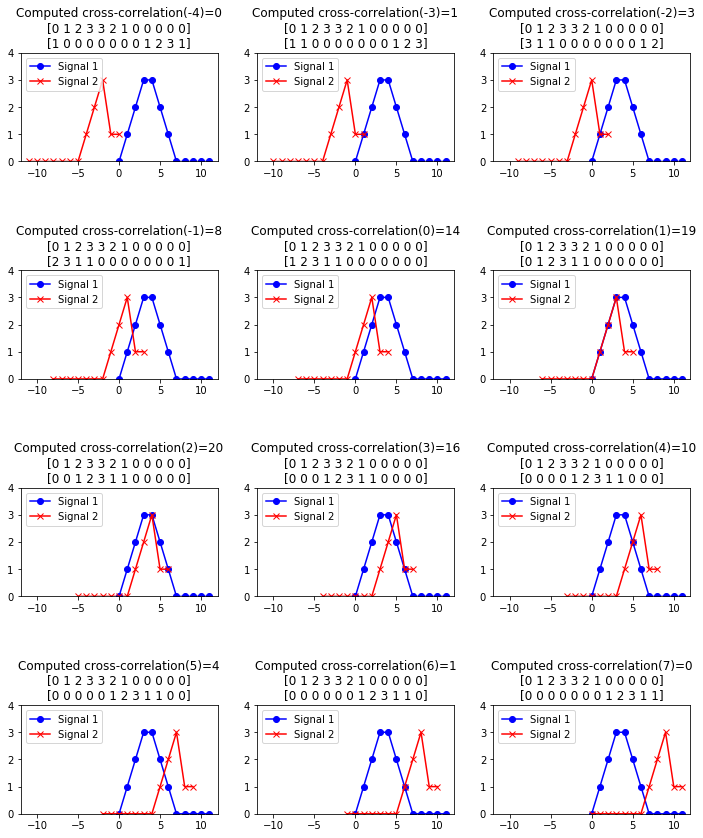

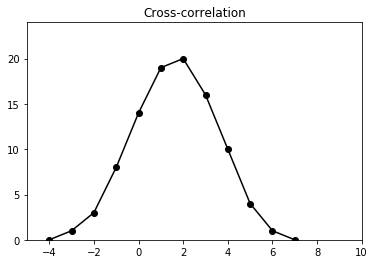

In [2]:
"""Compute the cross_correlation of two given signals    
Args:
signal1 (np.array): input signal 1
signal2 (np.array): input signal 2

Returns:
cross_correlation (np.array): cross-correlation of signal1 and signal2

>>> cross_correlation([0, 1, 2, 3, 3, 2, 1, 0], [0, 2, 3, 0])
[0, 0, 3, 8, 13, 15, 12, 7, 2, 0, 0]
>>> cross_correlation([0, 2, 3, 0], [0, 1, 2, 3, 3, 2, 1, 0])
[0, 0, 2, 7, 12, 15, 13, 8, 3, 0, 0]
"""
# Input signals for which to compute the cross-correlation
signal1 = np.array([0, 1, 2, 3, 3, 2, 1, 0])
signal2 = np.array([1, 2, 3, 1, 1])
corr=np.correlate(signal1, signal2, 'full')
print( 'input signals:'+str(signal1)+', '+str(signal2))
print( 'cross-correlation:'+str(corr)) 

# Pad with zeros to make the signals an appropriate size.
# How should we choose this size?
signal1 = np.lib.pad(signal1, (0, 4), 'constant')
signal2 = np.lib.pad(signal2, (0, 7), 'constant')

# Circularly shift signal2 until the last sample of signal 2 is aligned with the first sample of signal1
# Using a circular shift with the numpy.roll function is a convenient way to simulate shifting signals over time
signal2 = np.roll(signal2, -(5-1))
    
# Plot each operation required to compute the cross-correlation
plt.figure(figsize=(12,14))
signal2_plot = np.roll(signal2, -1)
#subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

for i in range(3*4):
    plt.subplot(4,3,i+1)
    plt.subplots_adjust(hspace = 1);
    plt.plot(signal1, 'bo-', label='Signal 1')
    plt.plot(range(-len(signal2_plot)+1+i,i+1), signal2_plot, 'rx-', label='Signal 2')
    plt.xlim(-12, 12)
    plt.ylim(0, 4)  
    plt.legend(loc = 'upper left') 
    plt.title('Computed cross-correlation(%d)=%d\n%s\n%s'%(i-4, np.dot(signal1, signal2), str(signal1), str(signal2)))
    signal2 = np.roll(signal2, 1)
    
# Adjust subplot spacing
#plt.tight_layout()
plt.figure()
plt.plot(range(-4,8),corr,'ko-') 
plt.title('Cross-correlation')
plt.xlim(-5, 10)
plt.ylim(0, 24)

### **<font color="red"> Based on the final result (the cross-correlation plot), how many samples (and in which direction) do you need to shift signal 2 in order to get it to match the best with signal 1? In other words, what does the x-axis on the correlation plot indicate?**

11

**<font color="red">Based on example shown above, implement the function below that will compute and return the cross-correlation of two input signals.**

**Things to consider:**
  * Built in `numpy` functions to compute sums of products mentioned above
  * Lengths of the input signals
  * Length of the output
  * Built in `numpy` functions shown above to append or prepend zeros to a signal
  
*Hint:* When computing the cross correlation try defining a numpy array of zeros of the known output length and setting individual values of it. Use operations such as `np.dot` and `np.roll` for array sum of products and array shifting, respectively.

In [104]:
def cross_correlation(signal1, signal2):
    """Compute the cross_correlation of two given signals    
    Args:
    signal1 (np.array): input signal 1
    signal2 (np.array): input signal 2
    
    Returns:
    cross_correlation (np.array): cross-correlation of signal1 and signal2
    
    >>> cross_correlation([0, 1, 2, 3, 3, 2, 1, 0], [0, 2, 3, 0])
    [0, 0, 3, 8, 13, 15, 12, 7, 2, 0, 0]
    >>> cross_correlation([0, 2, 3, 0], [0, 1, 2, 3, 3, 2, 1, 0])
    [0, 0, 2, 7, 12, 15, 13, 8, 3, 0, 0]
    """
    # BEGIN 
    total = len(signal1) + len(signal2) - 1
    
    sig1 = np.append(np.zeros([1,total-len(signal1)]), signal1)
    sig2 = np.append(signal2, np.zeros([1,total-len(signal2)]))
    
    length = total
    
    the_sig2 = np.zeros([length,length])
    the_sig2[0,:] = sig2
    
    for i in range(1, total):
        index = i - 1
        the_sig2[i,:] = np.roll(sig2, i)
    result = np.dot(the_sig2, sig1)
    
    return result
    # END 
    # This returns the same things as np.correlate(signal1, signal2, 'full')
    # Which is also the same as np.convolve(signal1, signal2[::-1])
    # Don't use those functions for your answer. Build your own correlation code.


In [105]:
signal1 = np.array([1,2,3])
total = 9
this = np.zeros([1,total+1-len(signal1)])
this
sig1 = np.append(signal1, this)

sig1

array([ 1.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [106]:
def test_correlation_plot(signal1, signal2, lib_result, your_result):
    # Plot the output
    fig = plt.figure(figsize=(8,3))    
    ax = plt.subplot(111)
    str_corr='Correct Answer (length='+str(len(lib_result))+')'
    str_your='Your Answer (length='+str(len(your_result))+')'
    
    ax.plot([x-len(signal2)+1 for x in range(len(lib_result))], lib_result, 'k', label=str_corr, lw=1.5)    
    ax.plot([x-len(signal2)+1 for x in range(len(your_result))], your_result, '--r', label=str_your, lw = 3)
    ax.set_title("Cross correlation of:\n%s\n%s"%(str(signal1), str(signal2)))
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


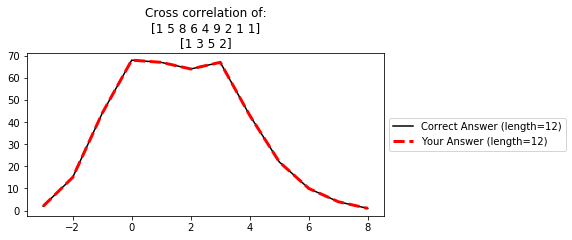

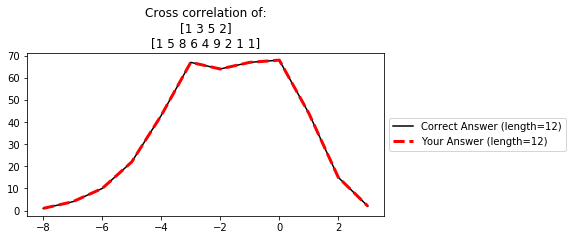

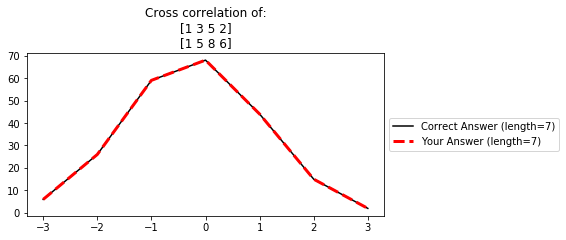

In [107]:
# You can change these signals to get more test cases
# Test 1
signal1 = np.array([1, 5, 8, 6, 4, 9, 2, 1, 1])
signal2 = np.array([1, 3, 5, 2])

# Run the test
lib_result, your_result = test_correlation(cross_correlation, signal1, signal2)
test_correlation_plot(signal1, signal2, lib_result, your_result)

# Test 2
signal1 = np.array([1, 3, 5, 2])
signal2 = np.array([1, 5, 8, 6, 4, 9, 2, 1, 1])

# Run the test
lib_result, your_result = test_correlation(cross_correlation, signal1, signal2)
test_correlation_plot(signal1, signal2, lib_result, your_result)

# Test 3
signal1 = np.array([1, 3, 5, 2])
signal2 = np.array([1, 5, 8, 6])

# Run the test
lib_result, your_result = test_correlation(cross_correlation, signal1, signal2)
test_correlation_plot(signal1, signal2, lib_result, your_result)

<a id='task2'></a>
## <font color="blue">Task 2: Extracting Information
We now have a powerful tool to measure how similar two signals are, and will now explore how to use that in the context of our acoustic positioning system.

Our positioning system will be transmitting what we will call a *beacon signal* from each speaker. Figure 3a shows example waveforms of a system composed of two beacons. The beacons are synchronized, meaning each beacon signal is transmitted from one of the speakers at the same time. Figure 3b demonstrates a scenario where the microphone is farther away from beacon 2, picking up its signal with a 3 millisecond delay with respect to beacon 1.

**Figure 3**
<img src="http://inst.eecs.berkeley.edu/~ee16a/images/location_img/Presentation1/Slide2.tiff.png" width=700px></img>

The raw received signal is the black line shown in Figure 4a, which is a superposition of beacon 1 and the delayed beacon 2 signals. Performing a *cross-correlation* of the recorded audio signal with stored copies of each beacon signal will tell us the time when the beacon signal arrives at the microphone. This will be the time that has maximum cross-correlation for a given beacon. As shown in Figure 4b, the cross-correlation of the recorded audio with a stored copy of beacon 1 has a maximum location that is separated by 3 milliseconds from the maximum location of the cross-correlation with beacon 2. Using this separation, we can infer that the distance of the microphone from the first beacon is less than the distance from the second beacon.

**Figure 4**
<img src="http://inst.eecs.berkeley.edu/~ee16a/images/location_img/Slide3.tiff.png" width=700px></img>

As you can see, even though the first and second beacon signals are different, there is still some non-zero cross-correlation between them, and there is noise that complicates the situation. In order to robustly identify the beacon signals with our single microphone recording, we would like for the same beacon signal to have a large cross-correlation with itself, but a very small cross-correlation with all of the others. 

Real GPS deals with this exact same problem and uses pseudorandom binary sequences (signals composed of just 1s and 0s), also known as ""Gold Codes"", constructed with exactly this property: they have small cross-correlation at all shifts, small autocorrelation at non-zero shifts compared to the auto-correlation value at zero. The theory and implementation of these signals is beyond the scope of this class, but simply understanding the properties of cross correlation explained above is enough to show why we will be using them. In the support code for this lab over the next few weeks, we have provided a large set of Gold codes that are designed to work together well. 

In the next cell, we will demonstrate three Gold Codes and do a small simulation of the audio beacons.

In [ ]:
# Model the sending of stored beacons, first 2000 samples
sent_0 = beacon[0][:2000]
sent_1 = beacon[1][:2000]
sent_2 = beacon[2][:2000]

# Model our received signal as the sum of each beacon, with some delay on each beacon.
delay_samples0 = 0;
delay_samples1 = 0;
delay_samples2 = 0;
received = np.roll(sent_0,delay_samples0) + np.roll(sent_1,delay_samples1) + np.roll(sent_2,delay_samples2)

def pltBeacons(delay_samples0,delay_samples1,delay_samples2):
    received_new = np.roll(sent_0,delay_samples0) + np.roll(sent_1,delay_samples1) + np.roll(sent_2,delay_samples2)
    plt.figure(figsize=(10,4))
    plt.subplot(2, 1, 1)
    plt.plot(received_new), plt.title('Received Signal (sum of beacons)'), plt.xlabel('Samples'), plt.ylabel('Amplitude')
    
    ax = plt.subplot(2, 1, 2)
    plt.plot([x-len(sent_0)+1 for x in range(len(cross_correlation(received_new, sent_0)))],cross_correlation(received_new, sent_0))
    plt.plot([x-len(sent_1)+1 for x in range(len(cross_correlation(received_new, sent_1)))],cross_correlation(received_new, sent_1))
    plt.plot([x-len(sent_2)+1 for x in range(len(cross_correlation(received_new, sent_2)))],cross_correlation(received_new, sent_2))
    legend( ('Corr. with Beacon 0', 'Corr. with Beacon 1', 'Corr. with Beacon 2') )
    plt.title('Cross-correlation of received signal and stored copy of Beacon n')
    plt.xlabel('Samples'), plt.ylabel('Correlation')
    plt.tight_layout()
    plt.draw()
    
interact(pltBeacons, delay_samples0 = (-500,500,10), delay_samples1 = (-500,500,10), delay_samples2 = (-500,500,10))


The sliders control the delay of each beacon (in units of samples). Play with the delay values for each beacon and see how the cross-correlation plot changes. 

**<font color="red">Pick some non-zero values for the sliders and comment on the location of the peak for each cross correlation. What is the relationship between the correlation peak and the delay for this part?**

<font color="red">Your answer here:


If you are given some beacon signals and a received signal, can you compute when (in sample) each beacon signal arrives?

**<font color="red">Implement a helper function `identify_peak` which takes in a signal with a single global maximum and returns the index of the peak of the signal.** <font color="red">This should be zero-indexed, as shown in the example input/output of the function below, instead of the way we've been time-indexing before.

In [108]:
def identify_peak(signal):
    """Returns the index of the peak of the given signal.
    Args:
    signal (np.array): input signal
    
    Returns:
    index (int): index of the peak
    
    >>> identify_peak([1, 2, 5, 7, 12, 4, 1, 0])
    4
    >>> identify_peak([1, 2, 2, 199, 23, 1])
    3
    """
    # BEGIN 
    largest = 0
    length = len(signal)
    for i in range(length):
        num = signal[i]
        if num >= largest:
            largest = num
            index = i
    return index
    # END

**<font color="red"> Implement a function `arrival_time`, which uses cross-correlation to identify the times at which each beacon arrived in samples.**

In [ ]:
def arrival_time(beacons, signal):
    """Returns a list of arrival times (in samples) of each beacon signal.
    Args:
    beacons (list): list in which each element is a numpy array representing one of the beacon signals
    signal (np.array): input signal, for example the values recorded by the microphone
    
    Returns:
    arrival_time [samples] (list): arrival time of the beacons in the order that they appear in the input 
    (e.g. [arrival of beacons[0], arrival of beacons[1]...])
    """
    # BEGIN 
    
    # END 

**<font color="red">Verify the following tests for each of the above functions passes.**

In [ ]:
test(cross_correlation, identify_peak, arrival_time, 2)

**Below code takes couple of seconds**

In [ ]:
# If you didn't implement cross-correlation using numpy functions this may take a few minutes to run.
# If you used numpy functions to implement cross-correlation as suggested it should take < 10 sec
# For a length 10,000 signal how total operations would computing the cross-correlation take?
test(cross_correlation, identify_peak, arrival_time, 3)
# If your functions' results are the opposite sign of the correct answer, switch the order of the 
# inputted signals into your cross-correlation function.

<a id='task3'></a>
## <font color="blue">Task 3: Detecting Real Signals

Now that we have reviewed the theoretical basis of cross-correlation and shown that it can be used to detect simulated signals, we will test the same functions you wrote with real data.

**<font color="red">Connect your microphone to the appropriate ports on the front of the computer and turn on the speakers.**

First, we need to choose the input device we are using. Run the following code to select audio (input/output) devices:

In [ ]:
import pyaudio
%run support_code/rec.py

<font color="blue">(Did this crash your kernel? Try shutting it down, plugging in your microphone and speakers as snugly as you can, and restarting.)

Now run the code below to define our API for recording signals:

In [ ]:
def record_signal():
    """Get the signal from the microphone"""
    return mic.new_data()

<font color='red'>Finally, we are ready to record the signal and test our functions! Use the application "VLC" to play the **offset_250_540_-321.wav** file in the lab folder and use your microphone to record it (by running the cell below - you may want to run it for several times when the wav file is playing to *clear the buffer*.)

In [ ]:
received_signal = record_signal()

We can now plot the received signal - make sure the signal fills up the whole recording duration!

In [ ]:
# Plot the received signal
plt.figure(figsize=(18,4))
plt.plot(received_signal)

Now you can test your code! Don't worry if you cannot understand the codes below - you will eventually understand that by the end of Lab 3! This may take a full minute to run.

**Note: the demodulated signal & beacon signals are decimated by 2 to reduce run time.**

In [ ]:
import scipy.signal
# Convert the received signals into the format our functions expect
%run support_code/demod.py
demod = demodulate_signal(received_signal)
demod_d = scipy.signal.decimate(demod,2)
beacon_d=[];
for b in beacon[:4]:
    b_d=scipy.signal.decimate(b,2)
    beacon_d.append(b_d)
sig = [cross_correlation(demod_d, b_d) for b_d in beacon_d[:4]]
sig = [average_signal(s) for s in sig]

In [ ]:
# Plot the cross-correlation with each beacon
plt.figure(figsize=(18,4))
for i in range(len(sig)):
    plt.plot(range(len(sig[i])), sig[i], label="Beacon %d"%(i+1))
plt.legend()

# Scale the x axis to show +/- 1000 samples around the peaks of the cross correlation
peak_times = ([argmax(sig[i]) for i in range(len(sig))])
plt.xlim(max(min(peak_times)-1000, 0), max(peak_times)+1000)

As you can see (if you have the correct implementation), we have several nice peaks after doing the cross-correlation. 
Next week, we will use the functions we wrote this week to determine distances.

**<font color="red">We'll be using our `identify_peak` and `arrival_time` functions we wrote here. The cell below will automatically save these functions to the file `ee16a_APS1_functions.py`. You will need this script for the next lab!
<br/>**

In [ ]:
from inspect import getsource
preamble = 'from __future__ import division \nfrom math import sin, cos, pi, sqrt  \nfrom random import random  \nfrom numpy import roll \nimport numpy as np\n'
b = getsource(identify_peak)
c = getsource(arrival_time)
%save ee16a_APS1_functions.py preamble+b+c

<a id='checkoff'></a>
## Checkoff
When you are ready to get checked off, please go to: https://goo.gl/forms/0gWz5atrac4Fyjii1. Fill out one form per person in your group. Follow the form exactly and submit. Your GSI or a Lab Assistant will come by once they are available and go through some checkoff questions with your group.

Additionally, please fill out: https://goo.gl/forms/qIJyFbmeJU4emRay1. To log when your group has finished. Thanks!

**Please return your speaker to the round table after you are done**